<a href="https://colab.research.google.com/github/DanielDan5399/Road-Damage/blob/master/RoadDamage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!git clone https://github.com/DanielDan5399/Road-Damage

fatal: destination path 'Road-Damage' already exists and is not an empty directory.


In [0]:
label_name=["cracks","pothole","Lines","Rutting"]

In [0]:
def load():
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
	 		
			label = imagePath.split("/")[-2]
			print(label)
			print(imagePath)
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)
	    # treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [0]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/Road-Damage"))
#print(imagePaths)

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
#sp = SimplePreprocessor(32, 32)
#sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = load()
#data = data.reshape((data.shape[0], 3072))


# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

[INFO] loading images...
Rutting
/content/Road-Damage/Rutting/Ruttings 62.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 26.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 100.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 70.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 51.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 20.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 16.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 44.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 84.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 17.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 13.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 66.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 65.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 68.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 14.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 83.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 8.jpg
Rutting
/content/Road-Damage/Rutting/Ruttings 91.jpg
Rutting
/content/Road

In [0]:
print(x_train.shape)

(777, 32, 32, 3)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 4)
Y_test = np_utils.to_categorical(y_test, 4)
y_train[100],Y_train[100]
#Y_train[10]

(0, array([1., 0., 0., 0.], dtype=float32))

In [0]:
print(x_test.shape)
print(x_train.shape)

(260, 32, 32, 3)
(777, 32, 32, 3)


In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
#model.add()
#ip = Input(shape=(32, 32, 3))
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [0]:
history=model.fit(x_train,Y_train,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 777 samples, validate on 260 samples
Epoch 1/50
777/777 [==============================] - 4s 5ms/step - loss: 1.2117 - accuracy: 0.4530 - val_loss: 1.1833 - val_accuracy: 0.4269
Epoch 2/50
777/777 [==============================] - 4s 5ms/step - loss: 1.1835 - accuracy: 0.4775 - val_loss: 1.1611 - val_accuracy: 0.4269
Epoch 3/50
777/777 [==============================] - 4s 5ms/step - loss: 1.1498 - accuracy: 0.4801 - val_loss: 1.1437 - val_accuracy: 0.5269
Epoch 4/50
777/777 [==============================] - 4s 5ms/step - loss: 1.1131 - accuracy: 0.5212 - val_loss: 1.0900 - val_accuracy: 0.5654
Epoch 5/50
777/777 [==============================] - 4s 5ms/step - loss: 1.0935 - accuracy: 0.5354 - val_loss: 1.0735 - val_accuracy: 0.5846
Epoch 6/50
777/777 [==============================] - 4s 5ms/step - loss: 0.9945 - accuracy: 0.6139 - val_loss: 0.9659 - val_accuracy: 0.6231
Epoch 7/50
777/777 [==============================] - 4s 5ms/step - loss: 0.9022 - accuracy: 0.6551 - 

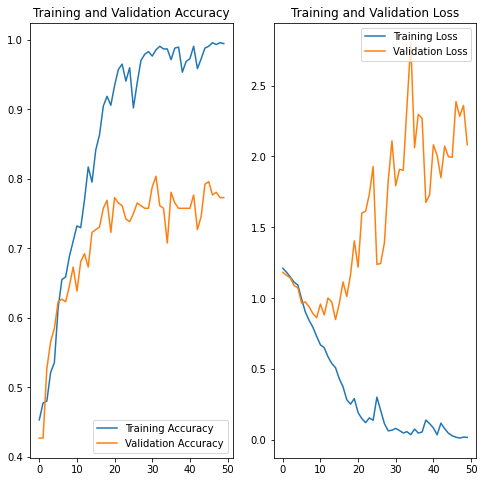

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epoch=50
epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()